# How model skill depends on MESHS threshold 

Here, we explore how model skill metrics depend on MESHS threshold and plot Figure 5 of the paper.

In [1]:
import sys, os
from pathlib import Path
#add path to path of current skript, where also utility.py lies
sys.path.append(Path.cwd().absolute())
#own utility functions
from utility import data_dir, read_at_centroid_data, compute_verification_stats, plot_skill_haz_threshold

#others
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib 

Specify hazard data, unit, croptypes and input and output directories. (here, entries in list croptypes are merged to one crop type, so ```['wheat','maize','barley','rapeseed']``` is used to get aggregate crop class field crops. 

In [2]:
#%% SETUP
variable='MESHS'
unit='mm'
croptypes_lists=[['wheat','maize','barley','rapeseed'],['grapevine']]
datadir = f"{data_dir}/data_at_centroid/"
figdir = 'C:/Users/F80840370/projects/scClim/climada/scClim/subproj_D/papers/NHESS/fig/'

Read at centroid data (i.e. the information on exposure, damage, and hail hazard at each centroid for each event.) for specified crops

In [3]:
at_centroid_data_crops={}
for croptypes in croptypes_lists:
    at_centroid_data, croptype = read_at_centroid_data(datadir,croptypes,variable=variable)
    at_centroid_data_crops[croptype] = at_centroid_data

Plot the figure

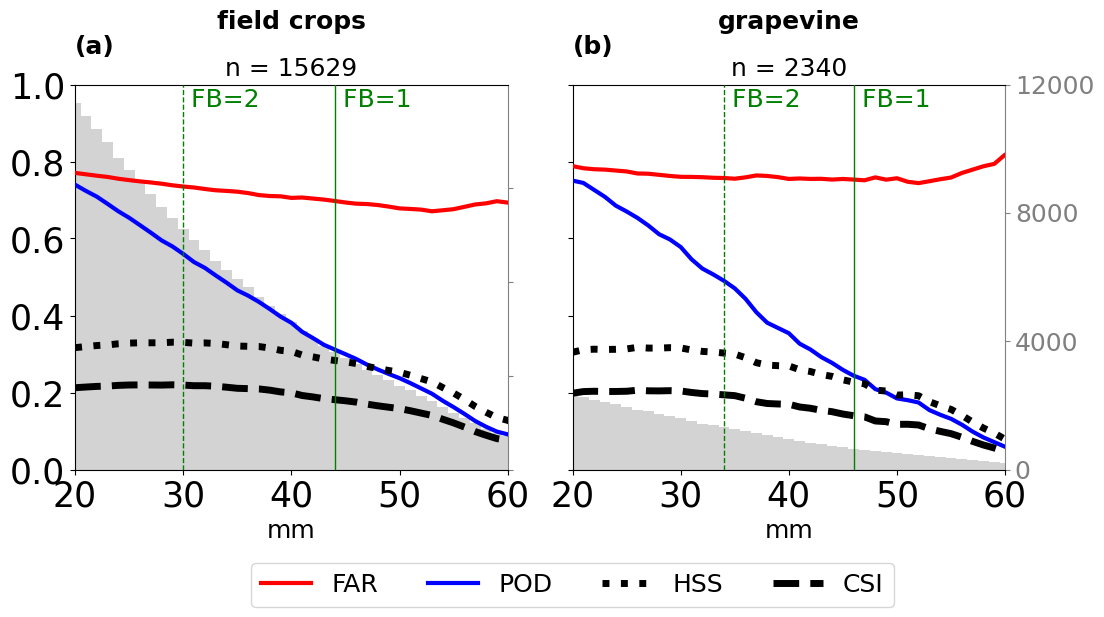

In [4]:
fig,ax=plot_skill_haz_threshold(at_centroid_data_crops['wheat_maize_barley_rapeseed'],at_centroid_data_crops['grapevine'],variable,unit, figdir, thresh=0)


Save the Figure

In [5]:
fig.savefig(f'{figdir}/Figure_02_two_crops.png',dpi=300,bbox_inches='tight')
fig.savefig(f'{figdir}/Figure_02_two_crops.pdf',dpi=300,bbox_inches='tight')